# Clustering

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [39]:
data=sns.load_dataset("penguins")
data=data.fillna(method="pad", axis=0)

## Getting a numerical DataFrame

In [40]:
def df_to_numbers(df):
    df_in_numbers = df.copy() 
    num_to_object =  dict()
    not_numerical_columns=list(df.select_dtypes(include=['object', 'category']).columns)
    for column in not_numerical_columns:
        values = [x for x in df_in_numbers[column].unique() if str(x)!="nan"]
        dictionary = {x:i for i, x in enumerate(values)}
        df_in_numbers = df_in_numbers.replace({column:dictionary})
        num_to_object[str(column)] = dictionary
    return df_in_numbers, num_to_object

In [41]:
data, df_to_objects= df_to_numbers(data)

## Calculating the best number of clusters

For this purpose *Silhouette score* is a interesting option to choose the number of clusters.

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
sil = []
kmax = 100

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))

Text(0.5, 1.0, 'Scores')

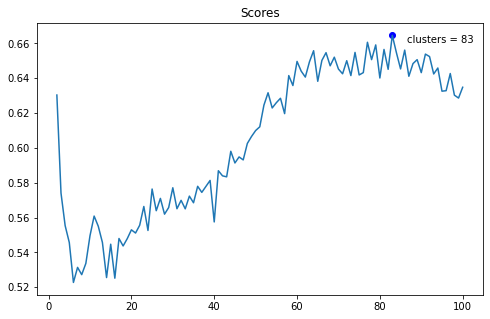

In [47]:
import matplotlib.pyplot as plt

maxim = np.argmax(sil) + 2
max_score = sil[maxim - 2]

plt.figure(figsize=(8,5))
plt.plot(range(2, kmax+1),sil)
plt.annotate("clusters = " + str(maxim), (maxim, max_score), textcoords="offset points", xytext=(15,-7))
plt.scatter(maxim, max_score, color="blue")
plt.title("Scores")

In [48]:
kmeans = KMeans(n_clusters = maxim).fit(data)

In [49]:
from sklearn.decomposition import PCA
import numpy as np
 
pca = PCA(2)
 
#Transform the data
reduced_data = pca.fit_transform(data)

In [56]:
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(reduced_data)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

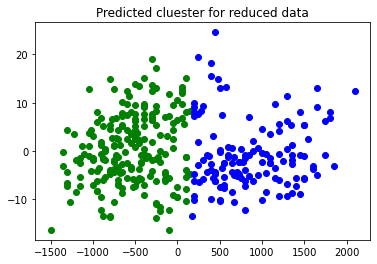

In [60]:
label0 = reduced_data[label == 0]
label1 = reduced_data[label == 1]
 
#Plotting the results
plt.scatter(label0[:,0] , label0[:,1] , color = 'green')
plt.scatter(label1[:,0] , label1[:,1] , color = 'blue')
plt.title("Predicted cluster for reduced data")
plt.show()